# 0. 라이브러리 불러오기

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

---

# 1. 데이터 불러오기

## 1.1 train data

In [2]:
train = pd.read_csv('~/aiffel/airlines/train.csv')

train.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target
0,1,Female,disloyal Customer,22,Business travel,Eco,1599,3,0,3,...,4,5,4,4,4,5,4,0,0.0,0
1,2,Female,Loyal Customer,37,Business travel,Business,2810,2,4,4,...,5,5,4,2,1,5,2,18,18.0,0
2,3,Male,Loyal Customer,46,Business travel,Business,2622,1,1,1,...,4,4,4,4,5,4,3,0,0.0,1
3,4,Female,disloyal Customer,24,Business travel,Eco,2348,3,3,3,...,3,2,4,5,3,4,3,10,2.0,0
4,5,Female,Loyal Customer,58,Business travel,Business,105,3,3,3,...,4,4,4,4,4,4,5,0,0.0,1


In [3]:
# id 컬럼 제거
train = train.drop('id', axis = 1)

In [4]:
train.shape

(3000, 23)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             3000 non-null   object 
 1   Customer Type                      3000 non-null   object 
 2   Age                                3000 non-null   int64  
 3   Type of Travel                     3000 non-null   object 
 4   Class                              3000 non-null   object 
 5   Flight Distance                    3000 non-null   int64  
 6   Seat comfort                       3000 non-null   int64  
 7   Departure/Arrival time convenient  3000 non-null   int64  
 8   Food and drink                     3000 non-null   int64  
 9   Gate location                      3000 non-null   int64  
 10  Inflight wifi service              3000 non-null   int64  
 11  Inflight entertainment             3000 non-null   int64

In [6]:
train.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
target                               0
dtype: int64

In [7]:
train.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,39.203000,1983.079333,2.863333,3.009667,2.874333,3.016667,3.259667,3.352333,3.50500,3.488000,3.497000,3.485000,3.728667,3.370000,3.728667,3.356333,15.634333,15.922000,0.556000
std,15.108802,1028.109117,1.394981,1.519543,1.431511,1.294713,1.322683,1.352826,1.31068,1.302211,1.283436,1.294218,1.154190,1.258158,1.161678,1.294057,45.083228,45.203411,0.496937
min,7.000000,52.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.00000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1348.250000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.00000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,39.000000,1937.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000,1.000000
75%,51.000000,2547.250000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.00000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000
max,80.000000,6882.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.000000,1115.000000,1.000000


## 1.2 test data

In [8]:
test = pd.read_csv('~/aiffel/airlines/test.csv')

test.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,Female,Loyal Customer,61,Personal Travel,Eco,2037,1,1,1,...,5,5,5,5,5,3,5,3,51,58.0
1,2,Female,disloyal Customer,27,Business travel,Business,1846,1,1,1,...,1,1,3,4,5,4,4,1,0,0.0
2,3,Female,Loyal Customer,52,Business travel,Business,1622,4,4,4,...,4,5,5,5,5,4,5,3,0,0.0
3,4,Male,Loyal Customer,54,Business travel,Business,3534,4,4,4,...,5,2,2,2,2,5,2,1,0,0.0
4,5,Female,Loyal Customer,41,Business travel,Eco,1471,4,3,3,...,4,4,3,1,2,5,4,4,0,0.0


In [9]:
test = test.drop('id', axis = 1)

In [10]:
test.shape

(2000, 22)

In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             2000 non-null   object 
 1   Customer Type                      2000 non-null   object 
 2   Age                                2000 non-null   int64  
 3   Type of Travel                     2000 non-null   object 
 4   Class                              2000 non-null   object 
 5   Flight Distance                    2000 non-null   int64  
 6   Seat comfort                       2000 non-null   int64  
 7   Departure/Arrival time convenient  2000 non-null   int64  
 8   Food and drink                     2000 non-null   int64  
 9   Gate location                      2000 non-null   int64  
 10  Inflight wifi service              2000 non-null   int64  
 11  Inflight entertainment             2000 non-null   int64

In [12]:
test.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

In [13]:
test.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000
mean,39.604500,1989.231500,2.898500,3.046500,2.900000,2.98200,3.218000,3.42550,3.478500,3.450500,3.499000,3.49750,3.701000,3.353000,3.703000,3.33700,12.105000,12.936500
std,15.061723,1046.961959,1.386059,1.509462,1.428993,1.31816,1.288529,1.32262,1.320382,1.289334,1.225459,1.27938,1.140723,1.260232,1.127576,1.30126,30.009636,30.843105
min,7.000000,50.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.00000,1.000000,1.000000,1.000000,0.00000,1.000000,1.000000,1.000000,1.00000,0.000000,0.000000
25%,27.000000,1379.250000,2.000000,2.000000,2.000000,2.00000,2.000000,2.00000,2.000000,2.000000,3.000000,2.00000,3.000000,3.000000,3.000000,2.00000,0.000000,0.000000
50%,40.000000,1961.500000,3.000000,3.000000,3.000000,3.00000,3.000000,4.00000,4.000000,4.000000,4.000000,4.00000,4.000000,3.000000,4.000000,3.50000,0.000000,0.000000
75%,51.000000,2564.250000,4.000000,4.000000,4.000000,4.00000,4.000000,4.00000,5.000000,4.000000,4.000000,5.00000,5.000000,4.000000,5.000000,4.00000,10.000000,12.000000
max,85.000000,6571.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.00000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.00000,448.000000,445.000000


## 1.3 target data Imbalance
* 불균형한 데이터가 아니기에 따로 처리하지 않았다.

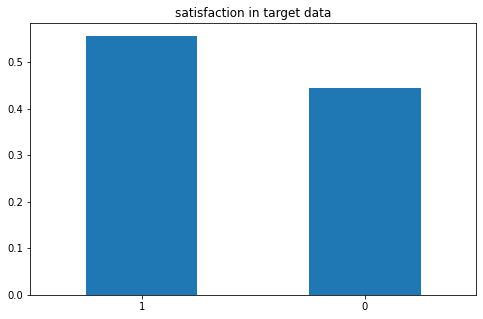

In [14]:
fig = plt.figure(figsize = (8, 5))
train.target.value_counts(normalize = True).plot(kind='bar', rot=0)
plt.title('satisfaction in target data')
plt.show()

---

# 2. 데이터 확인하기
* 범주형, 연속형, 순서형 데이터가 있는 것을 확인할 수 있다.
* 연속형 데이터 중에서 그래프가 한 쪽으로 치우친 feature들이 있다.
* 순서형 데이터 중에 몇 몇 feature에 0값이 있다.하지만 그 값들도 매우 작다.

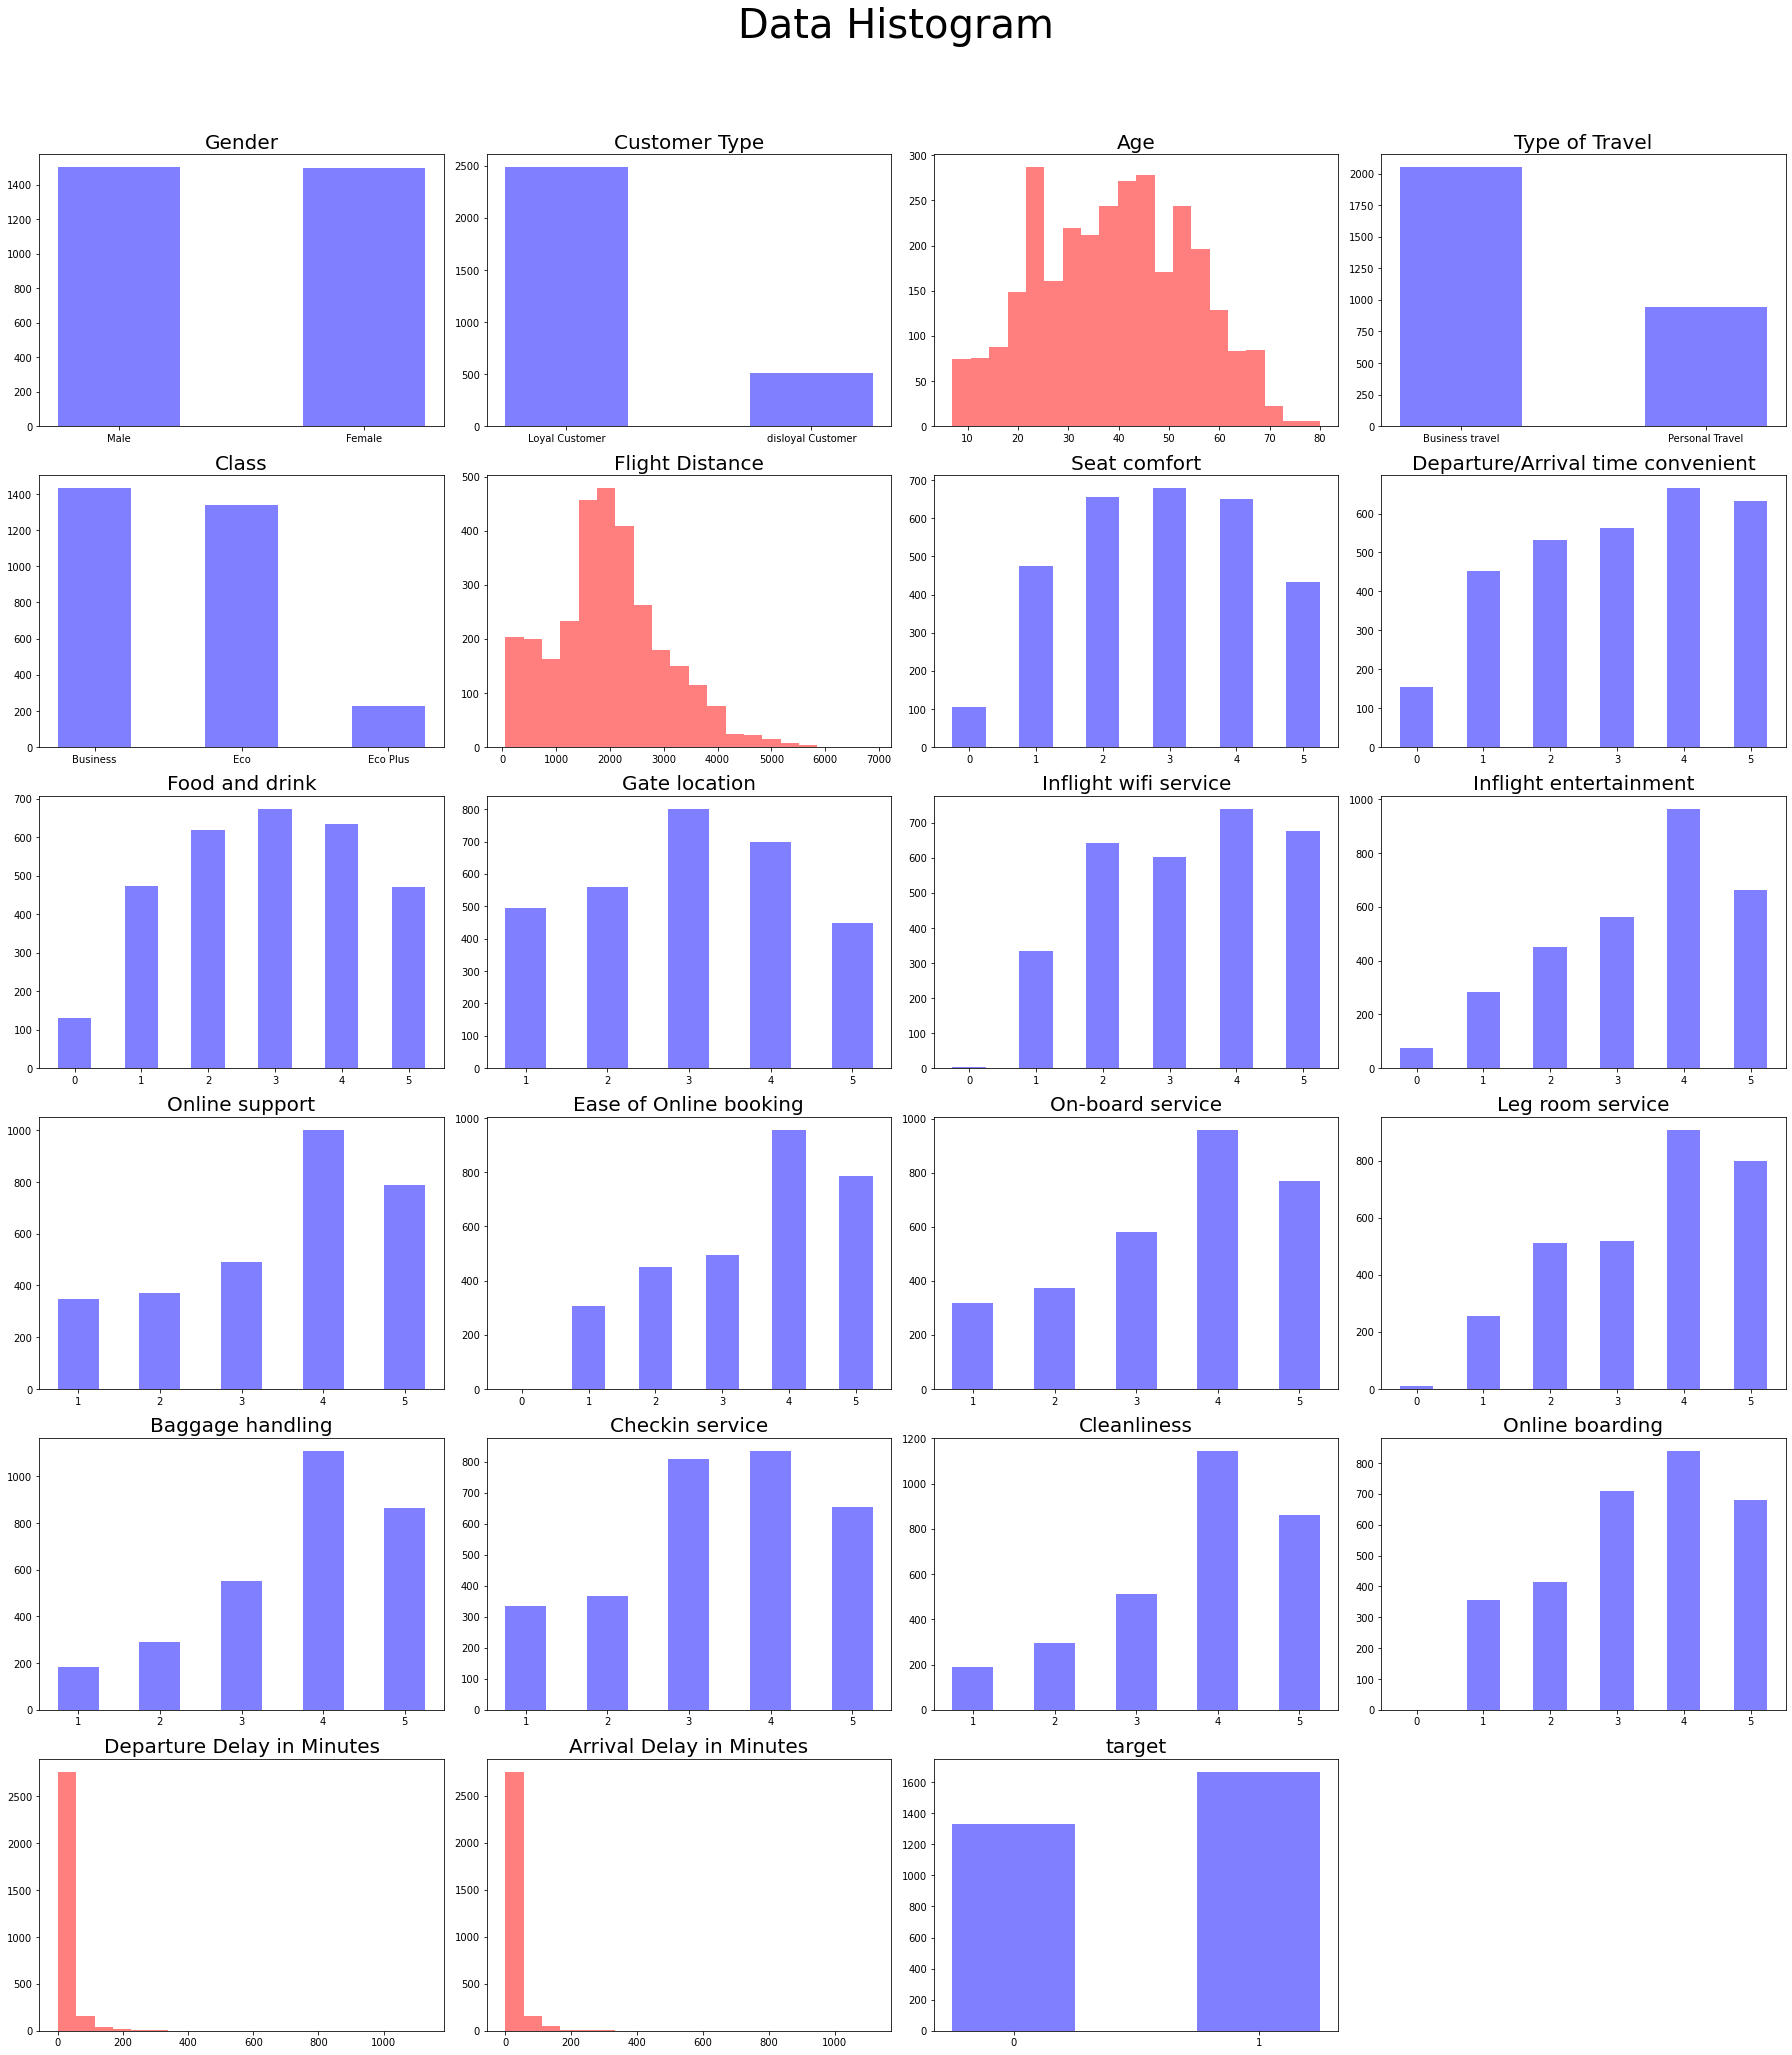

In [15]:
plt.figure(figsize=(25,30))
plt.suptitle("Data Histogram", fontsize=40)

cols = train.columns

for i in range(len(cols)):
    plt.subplot(6,4,i+1) 
    plt.title(cols[i], fontsize=20)
    if len(train[cols[i]].unique()) > 20:    # 특징의 고유한 값 종류가 20개 이상이면
        plt.hist(train[cols[i]], bins=20, color='r', alpha = 0.5)   # 빨간색으로 표현한 히스토그램 출력
        
    else:     # 특징의 고유한 값 종류가 20개가 넘지 않으면
        temp = train[cols[i]].value_counts()   # 각 특징 별 값 종류의 개수를 temp에 저장
        plt.bar(temp.keys(), temp.values, width=0.5, color = 'b', alpha = 0.5)  # 너비가 0.5이며 파란색으로 표현된 그래프 출력
        plt.xticks(temp.keys())    # x축에 눈금을 표시
        
plt.tight_layout(rect=[0, 0.03, 1, 0.95])   # 서브플롯 간의 간격을 유지
plt.show()

---

## 2.1 범주형 데이터
* violinplot을 활용해 범주형 데이터를 확인해봤으며, 유의미한 Feature들임을 확인하였다.

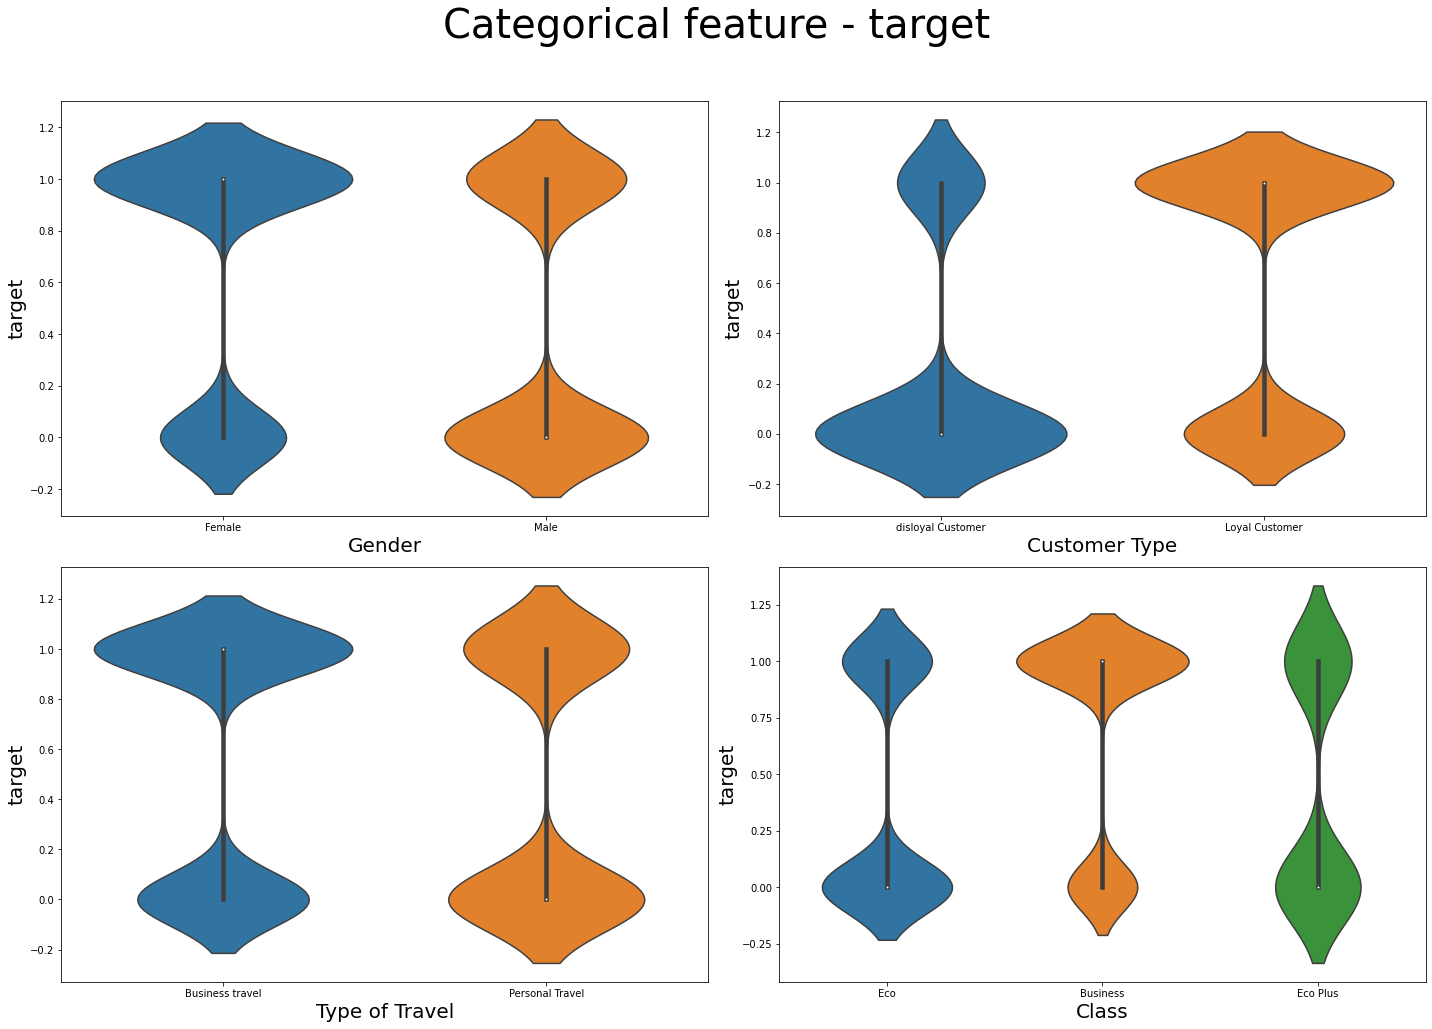

In [16]:
categorical_feature = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
target = 'target'

plt.figure(figsize = (20, 15))
plt.suptitle('Categorical feature - target', fontsize = 40)

for i in range(len(categorical_feature)):
    plt.subplot(2, 2, i+1)
    plt.xlabel(categorical_feature[i], fontsize = 20)
    plt.ylabel(target, fontsize = 20)
    sns.violinplot(x = train[categorical_feature[i]], y = train[target])
plt.tight_layout(rect = [0, 0.03, 1, 0.95])
plt.show()

* 라벨인코딩을 진행하여 데이터처리를 하였다.
* class는 3가지의 값을 가지고 있어 우선 0, 1, 2로 처리하였다.

In [17]:
Gender_mapping = {'Female' : 0, 'Male' : 1}
train['Gender'] = train['Gender'].map(Gender_mapping)
test['Gender'] = test['Gender'].map(Gender_mapping)

Customer_type_mapping = {'disloyal Customer' : 0, 'Loyal Customer' : 1}
train['Customer Type'] = train['Customer Type'].map(Customer_type_mapping)
test['Customer Type'] = test['Customer Type'].map(Customer_type_mapping)

Type_of_Travel_mapping = {'Business travel' : 0, 'Personal Travel' : 1}
train['Type of Travel'] = train['Type of Travel'].map(Type_of_Travel_mapping)
test['Type of Travel'] = test['Type of Travel'].map(Type_of_Travel_mapping)

Class_mapping = {'Business' : 0, 'Eco' : 1, 'Eco Plus' : 2}
train['Class'] = train['Class'].map(Class_mapping)
test['Class'] = test['Class'].map(Class_mapping)

* train 데이터를 확인해보면 라벨 인코딩이 잘 된 것을 확인할 수 있다.

In [18]:
train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target
0,0,0,22,0,1,1599,3,0,3,3,...,4,5,4,4,4,5,4,0,0.0,0
1,0,1,37,0,0,2810,2,4,4,4,...,5,5,4,2,1,5,2,18,18.0,0
2,1,1,46,0,0,2622,1,1,1,1,...,4,4,4,4,5,4,3,0,0.0,1
3,0,0,24,0,1,2348,3,3,3,3,...,3,2,4,5,3,4,3,10,2.0,0
4,0,1,58,0,0,105,3,3,3,3,...,4,4,4,4,4,4,5,0,0.0,1


* test 데이터를 확인해보면 라벨 인코딩이 잘 된 것을 확인할 수 있다.

In [19]:
test.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,1,61,1,1,2037,1,1,1,1,...,5,5,5,5,5,3,5,3,51,58.0
1,0,0,27,0,0,1846,1,1,1,4,...,1,1,3,4,5,4,4,1,0,0.0
2,0,1,52,0,0,1622,4,4,4,4,...,4,5,5,5,5,4,5,3,0,0.0
3,1,1,54,0,0,3534,4,4,4,4,...,5,2,2,2,2,5,2,1,0,0.0
4,0,1,41,0,1,1471,4,3,3,3,...,4,4,3,1,2,5,4,4,0,0.0


---

## 2.2 연속형 데이터
* 연속형 데이터 중 한 쪽으로 치우친 feature들은 정규화한다.
* 왜도를 보면 1이상인 것들(`Departure Delay in Minutes`, `Arrival Delay in Minutes`)을 처리하고자 한다.

In [20]:
numeric_feature = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

In [21]:
for i in numeric_feature:
    print(i, '왜도 : ', train[i].skew())

Age 왜도 :  0.0010456925943488839
Flight Distance 왜도 :  0.4509930169224059
Departure Delay in Minutes 왜도 :  9.190139679910239
Arrival Delay in Minutes 왜도 :  8.887761727831762


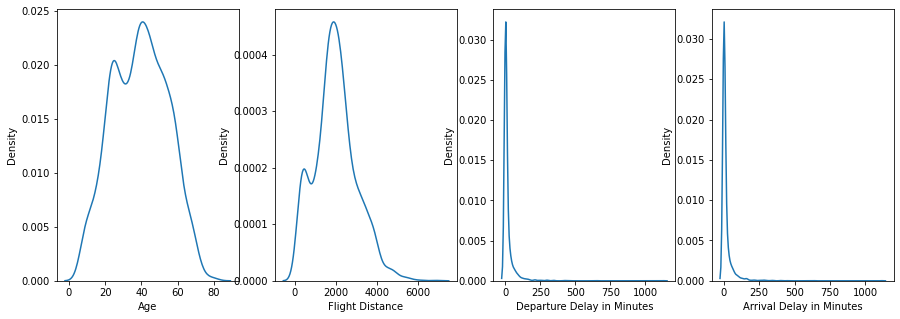

In [22]:
fig, ax = plt.subplots(1, 4, figsize = (15,5))

for i in range(len(numeric_feature)):
    sns.kdeplot(x = numeric_feature[i], data = train, ax = ax[i])

* `Departure Delay in Minutes`, `Arrival Delay in Minutes`를 로그 변환한다.

In [23]:
train['Departure Delay in Minutes'] = np.log1p(train['Departure Delay in Minutes'])
train['Arrival Delay in Minutes'] = np.log1p(train['Arrival Delay in Minutes'])

test['Departure Delay in Minutes'] = np.log1p(test['Departure Delay in Minutes'])
test['Arrival Delay in Minutes'] = np.log1p(test['Arrival Delay in Minutes'])

* 연속형 데이터의 모든 왜도가 1 이하로 내려간 것을 확인할 수 있다.

In [24]:
for i in numeric_feature:
    print(i, '왜도 : ', train[i].skew())

Age 왜도 :  0.0010456925943488839
Flight Distance 왜도 :  0.4509930169224059
Departure Delay in Minutes 왜도 :  0.9302111175258293
Arrival Delay in Minutes 왜도 :  0.8979015577156512


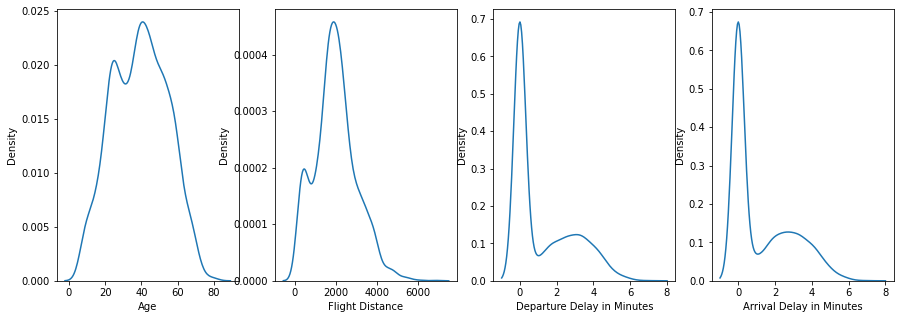

In [25]:
fig, ax = plt.subplots(1, 4, figsize = (15,5))

for i in range(len(numeric_feature)):
    sns.kdeplot(x = numeric_feature[i], data = train, ax = ax[i])

---

## 2.3 순서형 데이터
* 순서형 데이터를 확인해보면, 어떤 feature에는 0이 있고, 어떤 feature에는 0이 없다.
* 그래서 혹시 0이 매우 나쁨은 아닐지 확인을 해보았다.
* 순서형 데이터 feature와 target의 그래프를 살펴보면 0일 때, target 값이 1인 경우가 있는데 이것은 0이 '매우 나쁨'이 아니라고 말해준다.
* 따라서 응답을 하지 않은 경우라 판단이 되어 결측치로 처리하고자 한다.
* 몇 몇 feature의 0 응답이 적지 않아 데이터를 제거해주게 된다면 데이터 손실에 문제가 발생한다.

### ⭐ score 0을 다른 값으로 대체하는 방향으로 진행해보았다.
* score 0이 target이 1에 가까운 feature의 경우, 본인이 생각하기로 '매우 높음'을 뜻하는 5로 값을 대체해주었다.
* 반면에 score 0이 target이 0에 가까운 feature의 경우, '매우 나쁨'을 뜻하는 1로 값을 대체해주었다.
* 하지만 score 0을 비롯한 1~5 모든 값이 특정 target을 나타내지 않는 feature가 있었다. 이것은 최빈값으로 대체해주었다.

In [26]:
ordinal_feature = ['Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 'Gate location', 
           'Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking', 
           'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding']

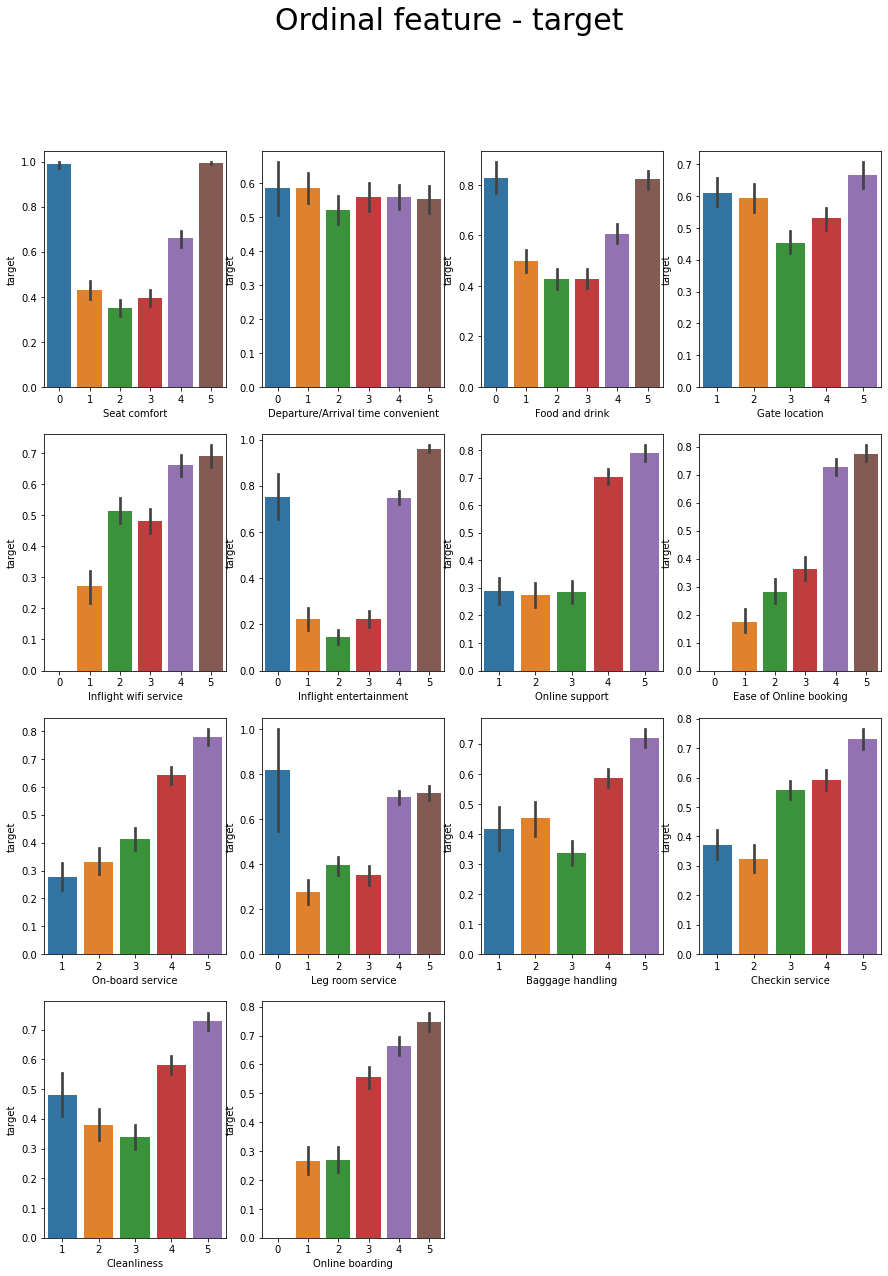

In [27]:
plt.figure(figsize = (15, 20))
plt.suptitle('Ordinal feature - target', fontsize = 30)

for i in range(len(ordinal_feature)):
    plt.subplot(4, 4, i+1)
    plt.xlabel(ordinal_feature[i])
    plt.ylabel(target)
    
    sns.barplot(x = train[ordinal_feature[i]], y = train[target])

plt.show()

In [28]:
print('Train 데이터')

for i in ordinal_feature:
    if len(train[train[i] == 0]) > 0:
        print(i, '결측치 갯수 : ', len(train[train[i] == 0]))

Train 데이터
Seat comfort 결측치 갯수 :  106
Departure/Arrival time convenient 결측치 갯수 :  154
Food and drink 결측치 갯수 :  129
Inflight wifi service 결측치 갯수 :  2
Inflight entertainment 결측치 갯수 :  73
Ease of Online booking 결측치 갯수 :  1
Leg room service 결측치 갯수 :  11
Online boarding 결측치 갯수 :  1


In [29]:
print('Test 데이터')

for i in ordinal_feature:
    if len(test[test[i] == 0]) > 0:
        print(i, '결측치 갯수 : ', len(test[test[i] == 0]))

Test 데이터
Seat comfort 결측치 갯수 :  64
Departure/Arrival time convenient 결측치 갯수 :  90
Food and drink 결측치 갯수 :  80
Inflight wifi service 결측치 갯수 :  1
Inflight entertainment 결측치 갯수 :  39
Leg room service 결측치 갯수 :  10


In [30]:
train['Seat comfort'] = train['Seat comfort'].replace(0, 5)
test['Seat comfort'] = test['Seat comfort'].replace(0, 5)

train['Food and drink'] = train['Food and drink'].replace(0, 5)
test['Food and drink'] = test['Food and drink'].replace(0, 5)

train['Inflight entertainment'] = train['Inflight entertainment'].replace(0, 4)
test['Inflight entertainment'] = test['Inflight entertainment'].replace(0, 4)

train['Leg room service'] = train['Leg room service'].replace(0, 5)
test['Leg room service'] = test['Leg room service'].replace(0, 5)

In [31]:
train['Inflight wifi service'] = train['Inflight wifi service'].replace(0, 1)
test['Inflight wifi service'] = test['Inflight wifi service'].replace(0, 1)

train['Ease of Online booking'] = train['Ease of Online booking'].replace(0, 1)
test['Ease of Online booking'] = test['Ease of Online booking'].replace(0, 1)

train['Online boarding'] = train['Online boarding'].replace(0, 1)
test['Online boarding'] = test['Online boarding'].replace(0, 1)

In [32]:
train['Departure/Arrival time convenient'] = train['Departure/Arrival time convenient'].replace(0, 4)
test['Departure/Arrival time convenient'] = test['Departure/Arrival time convenient'].replace(0, 4)

In [33]:
print('Train 데이터 결측치 처리 후 갯수')

for i in ordinal_feature:
    if len(train[train[i] == 0]) > 0:
        print(i, '결측치 갯수 : ', len(train[train[i] == 0]))

Train 데이터 결측치 처리 후 갯수


In [34]:
print('Test 데이터 결측치 처리 후 갯수')

for i in ordinal_feature:
    if len(test[test[i] == 0]) > 0:
        print(i, '결측치 갯수 : ', len(test[test[i] == 0]))

Test 데이터 결측치 처리 후 갯수


---

# 3. target과 feature 간 상관계수 확인
* 상관계수를 `spearman`을 활용하여 확인해보았다.
* target과의 상관계수가 낮은 feature를 제거하였다.
* 양의 상관계수, 음의 상관계수 상관없이 상관계수의 절댓값을 확인하였다.
    
    
* `Departure/Arrival time convenient`, `Gate location`, `Flight Distance`, `Departure Delay in Minutes` 총 4개의 feature를 train, test 데이터 셋에서 각각 제거하였다.

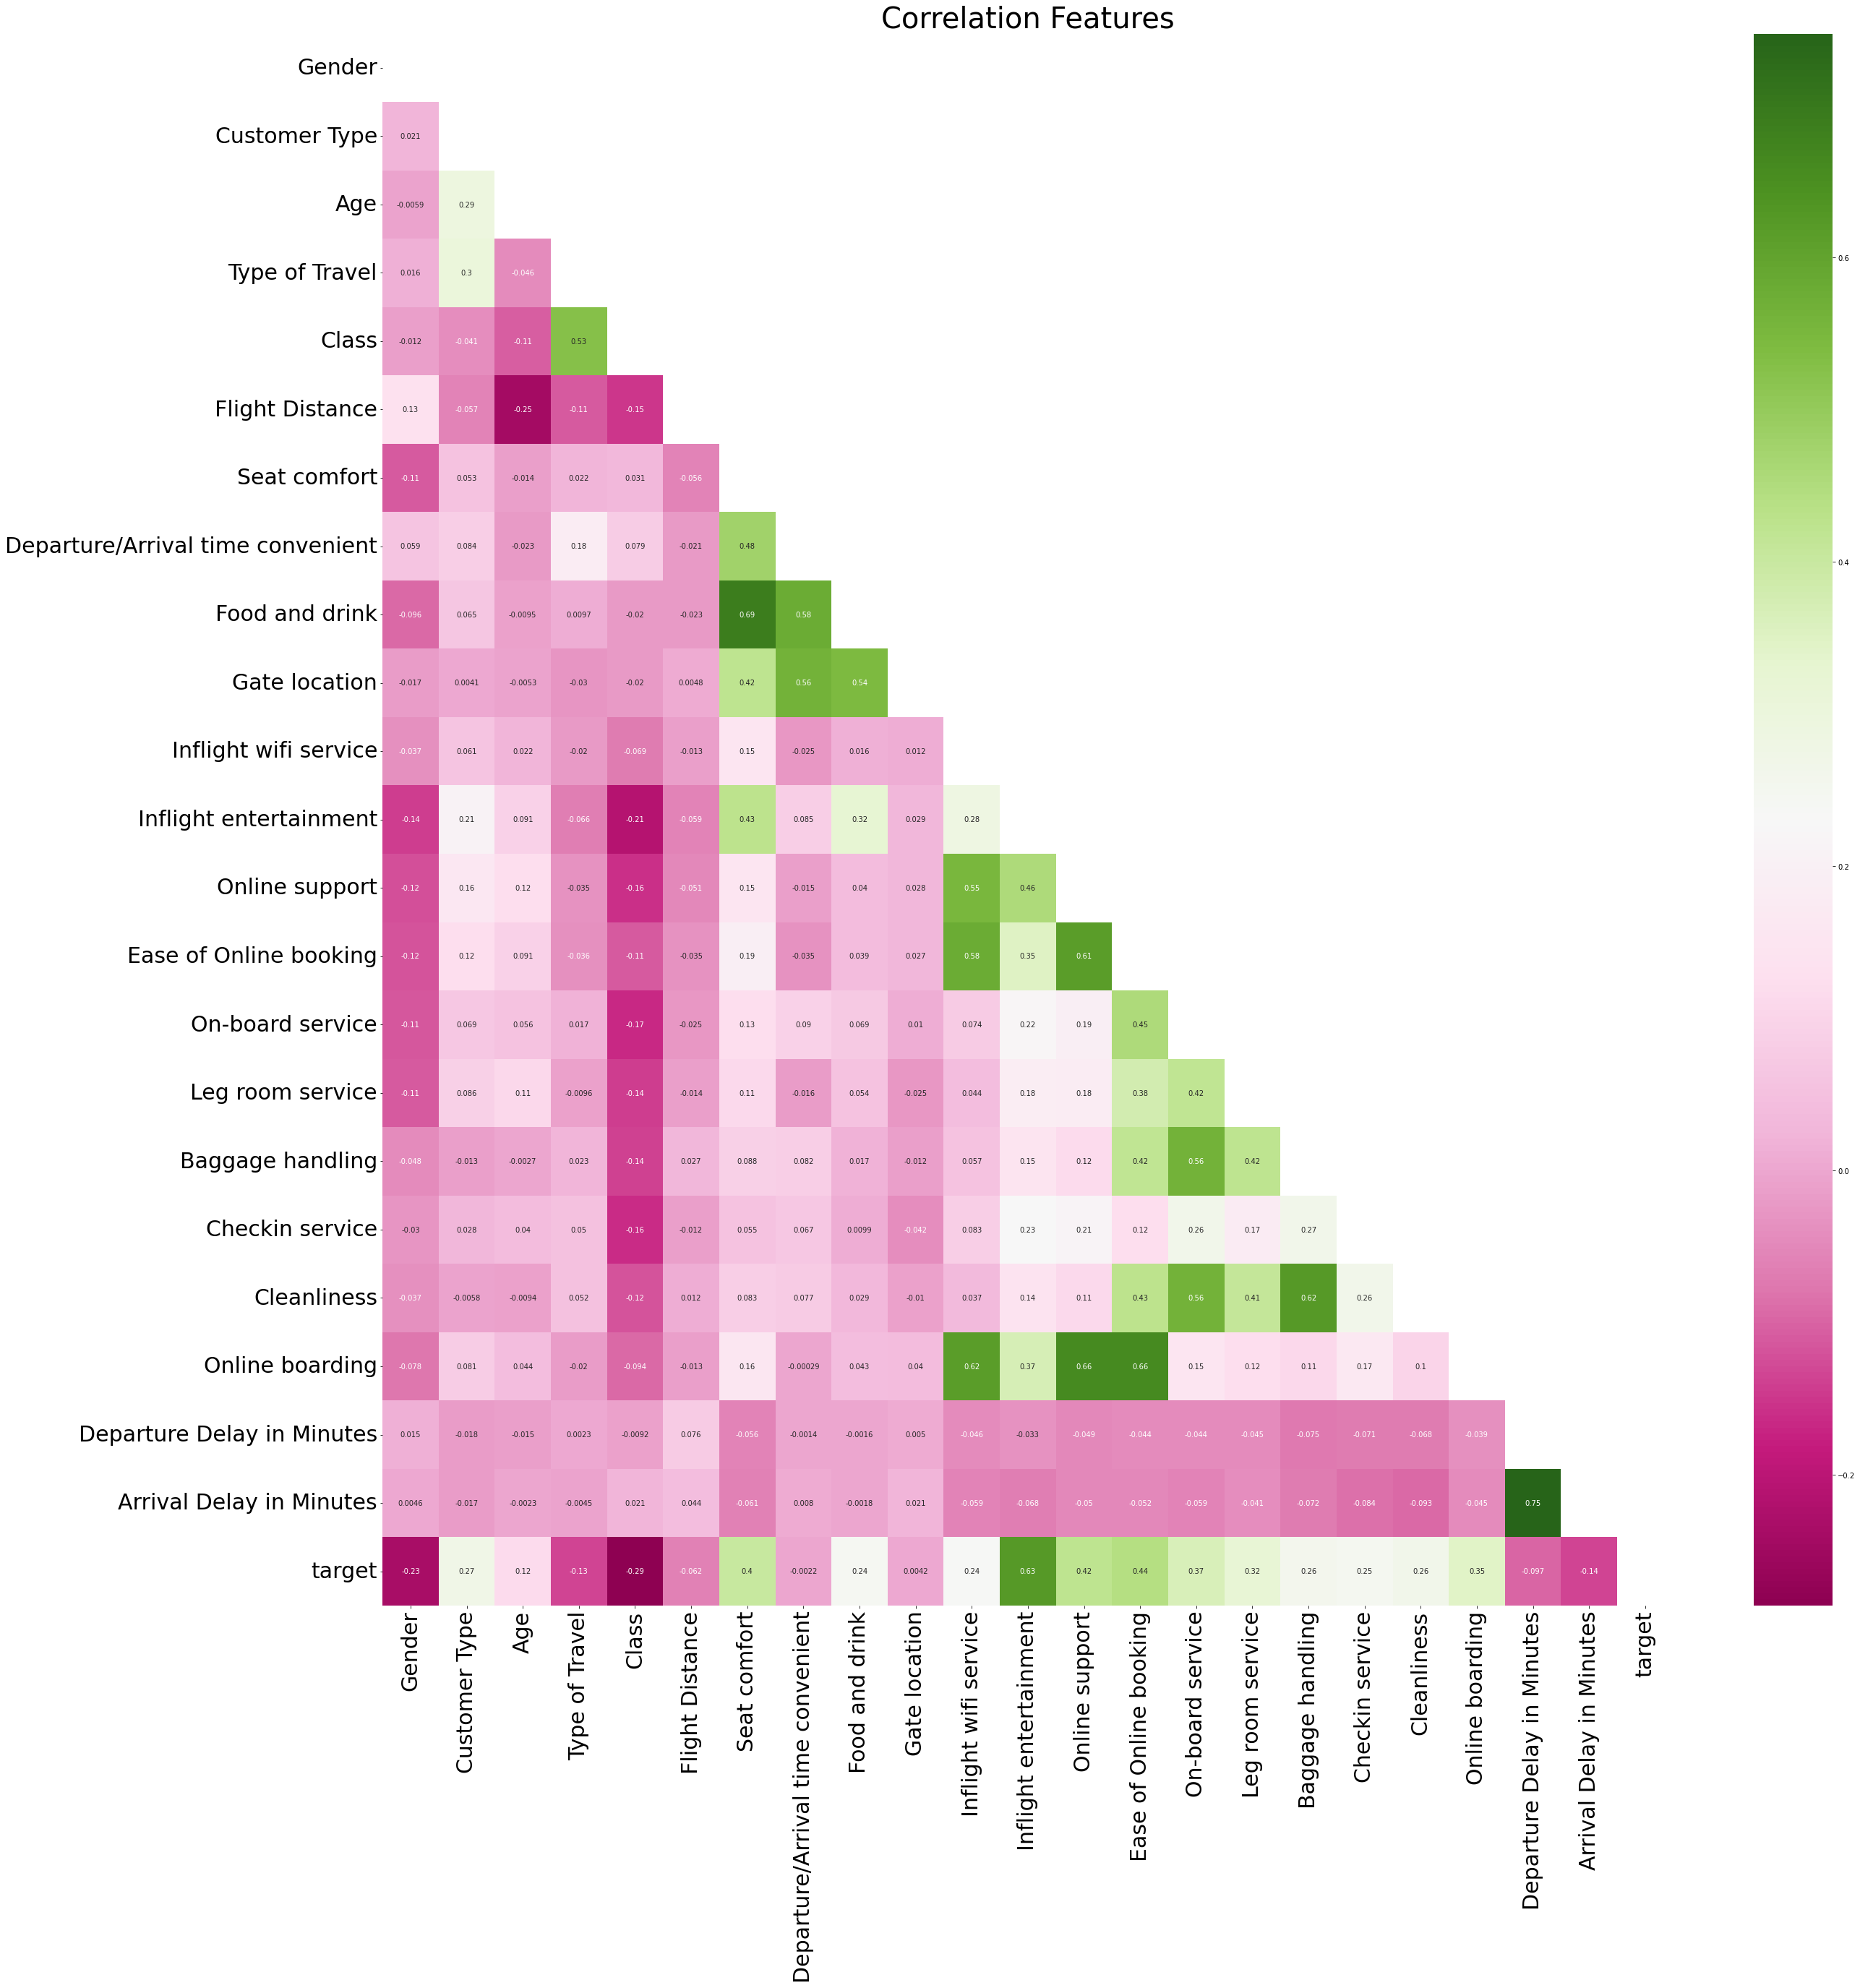

In [35]:
plt.figure(figsize = (40,40))

heat_table = train.corr(method = 'spearman')
mask = np.zeros_like(heat_table)
mask[np.triu_indices_from(mask)] = True

heatmap = sns.heatmap(heat_table, 
            annot=True,    # 실제 값을 표시
            cmap="PiYG",   # 색상
            mask = mask)   # 표시하지 않을 마스크 부분을 지정함

heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=30)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=30)

plt.title("Correlation Features", fontsize=40)
plt.show()

In [36]:
train.drop('Departure/Arrival time convenient', axis = 1, inplace = True)
train.drop('Gate location', axis = 1, inplace = True)
train.drop('Flight Distance', axis = 1, inplace = True)
train.drop('Departure Delay in Minutes', axis = 1, inplace = True)

test.drop('Departure/Arrival time convenient', axis = 1, inplace = True)
test.drop('Gate location', axis = 1, inplace = True)
test.drop('Flight Distance', axis = 1, inplace = True)
test.drop('Departure Delay in Minutes', axis = 1, inplace = True)

In [37]:
print(train.shape)
print(test.shape)

(3000, 19)
(2000, 18)


---

# 4. 모델 학습
* `Random Forest`, `xboost`, `LightGBM`, `Catboost` 총 4개의 모델로 학습을 진행하였다.
* 앙상블은 하지 않고 단일 모델로 학습하였다.

In [38]:
X = train.drop('target', axis = 1)
y = train['target']

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)

print('train 데이터 크기 : ', X_train.shape)
print('train 레이블 크기 : ', y_train.shape)
print('-----------------------')
print('test 데이터 크기 : ', X_test.shape)
print('test 레이블 크기 : ', y_test.shape)

train 데이터 크기 :  (2400, 18)
train 레이블 크기 :  (2400,)
-----------------------
test 데이터 크기 :  (600, 18)
test 레이블 크기 :  (600,)


## 4.1 Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

random_forest = RandomForestClassifier(random_state = 32)

random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)

## 4.2 xboost

In [41]:
import xgboost as xgb

model_xgb = xgb.XGBClassifier()

model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:07:36] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


## 4.3 LightGBM

In [42]:
import lightgbm as lgb

model_lgb = lgb.LGBMClassifier()

model_lgb.fit(X_train, y_train)
y_pred_lgb = model_lgb.predict(X_test)

accuracy_lgb = accuracy_score(y_test, y_pred_lgb)

## 4.4 Catboost

In [43]:
import catboost as cat

model_cat = cat.CatBoostClassifier()

model_cat.fit(X_train, y_train)
y_pred_cat = model_cat.predict(X_test)

accuracy_cat = accuracy_score(y_test, y_pred_cat)

Learning rate set to 0.014972
0:	learn: 0.6780422	total: 47.2ms	remaining: 47.2s
1:	learn: 0.6631972	total: 48.5ms	remaining: 24.2s
2:	learn: 0.6484636	total: 49.7ms	remaining: 16.5s
3:	learn: 0.6346462	total: 50.8ms	remaining: 12.7s
4:	learn: 0.6246733	total: 52ms	remaining: 10.3s
5:	learn: 0.6120504	total: 53.3ms	remaining: 8.83s
6:	learn: 0.5985869	total: 54.3ms	remaining: 7.7s
7:	learn: 0.5887509	total: 55.5ms	remaining: 6.88s
8:	learn: 0.5780875	total: 56.6ms	remaining: 6.23s
9:	learn: 0.5660607	total: 57.7ms	remaining: 5.71s
10:	learn: 0.5571500	total: 58.7ms	remaining: 5.27s
11:	learn: 0.5467675	total: 59.6ms	remaining: 4.91s
12:	learn: 0.5357995	total: 60.8ms	remaining: 4.61s
13:	learn: 0.5271896	total: 61.6ms	remaining: 4.34s
14:	learn: 0.5183344	total: 62.6ms	remaining: 4.11s
15:	learn: 0.5091348	total: 63.7ms	remaining: 3.92s
16:	learn: 0.4997902	total: 64.8ms	remaining: 3.75s
17:	learn: 0.4905106	total: 65.9ms	remaining: 3.6s
18:	learn: 0.4838835	total: 67ms	remaining: 3.46

In [44]:
print('randomforest accuracy : ', accuracy_rf)
print('xboost accuracy : ', accuracy_xgb)
print('LightGBM accuracy : ', accuracy_lgb)
print('Catboost accuracy : ', accuracy_cat)

randomforest accuracy :  0.94
xboost accuracy :  0.9333333333333333
LightGBM accuracy :  0.9333333333333333
Catboost accuracy :  0.95


---

# 5. 예측
* `Catboost`의 정확도가 0.946으로 가장 높게 나와 해당 모델로 예측을 해보았다.
* DACON에 제출을 하였고, 점수는 `0.941`이 나왔다.

In [45]:
submission = pd.read_csv('~/aiffel/airlines/sample_submission.csv')

submission.head()

,id,target
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [46]:
model_cat.fit(X_train, y_train)
y_pred_cat = model_cat.predict(test)

submission['target'] = y_pred_cat.astype('int8')
submission

Learning rate set to 0.014972
0:	learn: 0.6780422	total: 1.35ms	remaining: 1.35s
1:	learn: 0.6631972	total: 2.56ms	remaining: 1.28s
2:	learn: 0.6484636	total: 3.7ms	remaining: 1.23s
3:	learn: 0.6346462	total: 4.83ms	remaining: 1.2s
4:	learn: 0.6246733	total: 5.86ms	remaining: 1.17s
5:	learn: 0.6120504	total: 6.97ms	remaining: 1.15s
6:	learn: 0.5985869	total: 8.05ms	remaining: 1.14s
7:	learn: 0.5887509	total: 9.11ms	remaining: 1.13s
8:	learn: 0.5780875	total: 10.1ms	remaining: 1.12s
9:	learn: 0.5660607	total: 11.3ms	remaining: 1.12s
10:	learn: 0.5571500	total: 12.4ms	remaining: 1.11s
11:	learn: 0.5467675	total: 13.4ms	remaining: 1.1s
12:	learn: 0.5357995	total: 14.5ms	remaining: 1.1s
13:	learn: 0.5271896	total: 15.5ms	remaining: 1.09s
14:	learn: 0.5183344	total: 16.6ms	remaining: 1.09s
15:	learn: 0.5091348	total: 17.7ms	remaining: 1.09s
16:	learn: 0.4997902	total: 18.8ms	remaining: 1.09s
17:	learn: 0.4905106	total: 20ms	remaining: 1.09s
18:	learn: 0.4838835	total: 21.3ms	remaining: 1.1s

,id,target
0,1,1
1,2,0
2,3,1
3,4,1
4,5,1
...,...,...
1995,1996,0
1996,1997,1
1997,1998,0
1998,1999,1


In [47]:
submission.to_csv("Catboost_4.csv", index=False)